In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
#!pip install openpyxl
raw_data = pd.read_excel('../../apple_dataset_v4.xlsx', engine='openpyxl')

In [34]:
raw_data.dtypes

Unnamed: 0      int64
area          float64
perimeter     float64
red_mean      float64
green_mean    float64
blue_mean     float64
f1            float64
f2            float64
red_std       float64
green_std     float64
blue_std      float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
label           int64
dtype: object

In [35]:
raw_data.drop(['Unnamed: 0'],axis = 1, inplace=True)

In [36]:
raw_data.columns

Index(['area', 'perimeter', 'red_mean', 'green_mean', 'blue_mean', 'f1', 'f2',
       'red_std', 'green_std', 'blue_std', 'f4', 'f5', 'f6', 'f7', 'f8',
       'label'],
      dtype='object')

In [37]:
raw_data.corr(method ='pearson')

,area,perimeter,red_mean,green_mean,blue_mean,f1,f2,red_std,green_std,blue_std,f4,f5,f6,f7,f8,label
area,1.000000,0.878843,0.412529,0.458382,0.406890,0.300815,-0.300815,0.157759,0.085235,0.069237,-0.053835,0.122362,-0.546659,-0.572725,0.168848,-0.099216
perimeter,0.878843,1.000000,0.283858,0.301344,0.277562,0.170882,-0.170882,0.159844,0.109740,0.104308,0.002602,0.118905,-0.369693,-0.374929,0.113184,-0.061680
red_mean,0.412529,0.283858,1.000000,0.873240,0.887728,0.129082,-0.129082,0.788779,0.519859,0.574523,0.025375,0.236994,-0.788028,-0.794919,0.428375,-0.065759
green_mean,0.458382,0.301344,0.873240,1.000000,0.962464,0.477160,-0.477160,0.609913,0.659866,0.645145,0.043077,0.237477,-0.843482,-0.867009,0.480674,0.177487
blue_mean,0.406890,0.277562,0.887728,0.962464,1.000000,0.345627,-0.345627,0.642156,0.639513,0.716294,0.022985,0.192175,-0.784028,-0.818928,0.489104,0.230854
f1,0.300815,0.170882,0.129082,0.477160,0.345627,1.000000,-1.000000,0.000422,0.366794,0.235472,0.242435,0.333281,-0.484651,-0.471827,-0.002323,0.141234
f2,-0.300815,-0.170882,-0.129082,-0.477160,-0.345627,-1.000000,1.000000,-0.000422,-0.366794,-0.235472,-0.242435,-0.333281,0.484651,0.471827,0.002323,-0.141234
red_std,0.157759,0.159844,0.788779,0.609913,0.642156,0.000422,-0.000422,1.000000,0.737691,0.781612,0.389436,0.475817,-0.520525,-0.428014,0.202625,-0.149822
green_std,0.085235,0.109740,0.519859,0.659866,0.639513,0.366794,-0.366794,0.737691,1.000000,0.925187,0.428966,0.430273,-0.419283,-0.341908,0.285902,0.232778
blue_std,0.069237,0.104308,0.574523,0.645145,0.716294,0.235472,-0.235472,0.781612,0.925187,1.000000,0.417900,0.411454,-0.410031,-0.344916,0.257820,0.286950


**Insights:**
Less correlated features are:
- green channel mean
- red channel std
- blue channel std
- f5
- f8

Also f1 and f2 are mutually relative So one of them can be removed

In [74]:
cleaned_data = raw_data

In [75]:
cleaned_data.corr(method ='pearson')

,area,perimeter,red_mean,green_mean,blue_mean,f1,f2,red_std,green_std,blue_std,f4,f5,f6,f7,f8,label
area,1.000000,0.878843,0.412529,0.458382,0.406890,0.300815,-0.300815,0.157759,0.085235,0.069237,-0.053835,0.122362,-0.546659,-0.572725,0.168848,-0.099216
perimeter,0.878843,1.000000,0.283858,0.301344,0.277562,0.170882,-0.170882,0.159844,0.109740,0.104308,0.002602,0.118905,-0.369693,-0.374929,0.113184,-0.061680
red_mean,0.412529,0.283858,1.000000,0.873240,0.887728,0.129082,-0.129082,0.788779,0.519859,0.574523,0.025375,0.236994,-0.788028,-0.794919,0.428375,-0.065759
green_mean,0.458382,0.301344,0.873240,1.000000,0.962464,0.477160,-0.477160,0.609913,0.659866,0.645145,0.043077,0.237477,-0.843482,-0.867009,0.480674,0.177487
blue_mean,0.406890,0.277562,0.887728,0.962464,1.000000,0.345627,-0.345627,0.642156,0.639513,0.716294,0.022985,0.192175,-0.784028,-0.818928,0.489104,0.230854
f1,0.300815,0.170882,0.129082,0.477160,0.345627,1.000000,-1.000000,0.000422,0.366794,0.235472,0.242435,0.333281,-0.484651,-0.471827,-0.002323,0.141234
f2,-0.300815,-0.170882,-0.129082,-0.477160,-0.345627,-1.000000,1.000000,-0.000422,-0.366794,-0.235472,-0.242435,-0.333281,0.484651,0.471827,0.002323,-0.141234
red_std,0.157759,0.159844,0.788779,0.609913,0.642156,0.000422,-0.000422,1.000000,0.737691,0.781612,0.389436,0.475817,-0.520525,-0.428014,0.202625,-0.149822
green_std,0.085235,0.109740,0.519859,0.659866,0.639513,0.366794,-0.366794,0.737691,1.000000,0.925187,0.428966,0.430273,-0.419283,-0.341908,0.285902,0.232778
blue_std,0.069237,0.104308,0.574523,0.645145,0.716294,0.235472,-0.235472,0.781612,0.925187,1.000000,0.417900,0.411454,-0.410031,-0.344916,0.257820,0.286950


In [76]:
cleaned_data = cleaned_data.dropna()

In [77]:
raw_data.shape

(4259, 16)

In [78]:
cleaned_data.shape

(4259, 16)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold 


In [80]:
df = cleaned_data.reset_index()

In [81]:
X = df.drop(['index','label'],axis = 1, inplace=False)
y = df['label']
print(X.shape)
print(y.shape)

(4259, 15)
(4259,)


In [82]:
k = 5
kf = KFold(n_splits=k, random_state=9, shuffle = True)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
 
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)            # classification
    acc = accuracy_score(pred_values , y_test)     # Classification

    #acc = model.score(X_test,y_test)                # Regression
    
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('Score of each fold - {}'.format(acc_score))
print('Avg Score : {}'.format(avg_acc_score))

Score of each fold - [0.8838028169014085, 0.8779342723004695, 0.8509389671361502, 0.8509389671361502, 0.863689776733255]
Avg Score : 0.8654609600414865


# **K- fold Cross validation accuracy:**
# **0.870497738821671**

# ROC Curve

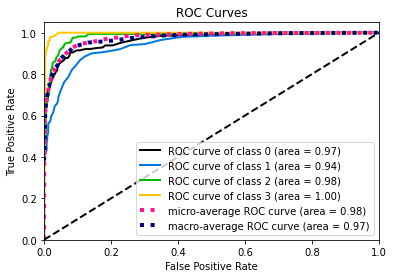

In [83]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_true, y_probas)

plt.show()

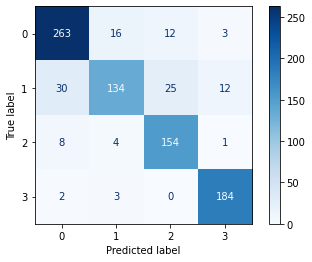

In [84]:
from sklearn.metrics import plot_confusion_matrix
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, values_format = 'd',cmap = 'Blues',display_labels = ['0','1','2','3'])

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, [0,1,2,3]))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       294
           1       0.85      0.67      0.75       201
           2       0.81      0.92      0.86       167
           3       0.92      0.97      0.95       189

    accuracy                           0.86       851
   macro avg       0.86      0.86      0.86       851
weighted avg       0.86      0.86      0.86       851



# **F1 Score:**
# **0.89**

# Deployment

In [86]:
from sklearn.ensemble import RandomForestClassifier
lm = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
lm.fit(X,y)
print('Training Score: ',lm.score(X,y))

Training Score:  0.9978868278938718


In [87]:
lm.feature_importances_

array([0.05520544, 0.03797776, 0.05342042, 0.05036077, 0.06510753,
       0.07315376, 0.07208629, 0.07095949, 0.07089202, 0.08191694,
       0.07194256, 0.08373639, 0.04502219, 0.05408765, 0.11413078])

# Selected Features

In [88]:
X.columns

Index(['area', 'perimeter', 'red_mean', 'green_mean', 'blue_mean', 'f1', 'f2',
       'red_std', 'green_std', 'blue_std', 'f4', 'f5', 'f6', 'f7', 'f8'],
      dtype='object')